In [ ]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a <- 5
b <- 7
c <- a + b

In [ ]:
fruit <- c("a",'b','c')

In [ ]:
print(fruit)

[1] "a" "b" "c"


In [ ]:
print(c)

[1] 12


In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("devtools")
library("arules")
library("RColorBrewer")

Loading required package: usethis

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
data <- paste(
  "# this is some test data", 
  "I1, I2, I5", 
  "I2, I4", 
  "I2, I3", 
  "I1, I2, I4",
  "I1, I3",  
  "I2, I3", 
  "I1, I3", 
  "I1, I2, I3, I5", 
  "I1, I2, I3", 
  sep="\n")
cat(data)
write(data, file="demo_basket.txt")

# this is some test data
I1, I2, I5
I2, I4
I2, I3
I1, I2, I4
I1, I3
I2, I3
I1, I3
I1, I2, I3, I5
I1, I2, I3

In [ ]:
tr1=read.transactions("demo_basket.txt", format="basket", sep=",", skip=1)
inspect(tr1)
itemLabels(tr1)

    items           
[1] {I1, I2, I5}    
[2] {I2, I4}        
[3] {I2, I3}        
[4] {I1, I2, I4}    
[5] {I1, I3}        
[6] {I2, I3}        
[7] {I1, I3}        
[8] {I1, I2, I3, I5}
[9] {I1, I2, I3}    


[1] "I1" "I2" "I3" "I4" "I5"

In [ ]:
data <- paste(
  "trans1 item1", 
  "trans2 item1",
  "trans2 item2", 
  sep ="\n")
cat(data)
write(data, file = "demo_single.txt")


trans1 item1
trans2 item1
trans2 item2

In [ ]:
tr2=read.transactions("demo_single.txt", format="single", cols=c(1, 2))
inspect(tr2)
itemLabels(tr2)

    items          transactionID
[1] {item1}        trans1       
[2] {item1, item2} trans2       


[1] "item1" "item2"

In [ ]:
data <- paste(
  "item_id;trans_id",
  "item1;trans1", 
  "item1;trans2",
  "item2;trans2", 
  sep ="\n")
cat(data)
write(data, file = "demo_single2.txt")


item_id;trans_id
item1;trans1
item1;trans2
item2;trans2

In [ ]:
tr3=read.transactions("demo_single2.txt", format="single", sep=";", cols=c("trans_id", "item_id"),header = TRUE)
inspect(tr3)
itemLabels(tr3)

    items          transactionID
[1] {item1}        trans1       
[2] {item1, item2} trans2       


[1] "item1" "item2"

In [ ]:
rules1=apriori(tr1, parameter=list(supp=0.2, conf=0.6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 9 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [12 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
summary(rules1)

set of 12 rules

rule length distribution (lhs + rhs):sizes
1 2 3 
3 7 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.750   2.000   1.917   2.000   3.000 

summary of quality measures:
    support         confidence        coverage           lift       
 Min.   :0.2222   Min.   :0.6667   Min.   :0.2222   Min.   :0.8571  
 1st Qu.:0.2222   1st Qu.:0.6667   1st Qu.:0.2222   1st Qu.:1.0000  
 Median :0.4444   Median :0.7222   Median :0.6667   Median :1.0000  
 Mean   :0.4167   Mean   :0.8148   Mean   :0.5648   Mean   :1.1310  
 3rd Qu.:0.5000   3rd Qu.:1.0000   3rd Qu.:0.7500   3rd Qu.:1.2857  
 Max.   :0.7778   Max.   :1.0000   Max.   :1.0000   Max.   :1.5000  
     count     
 Min.   :2.00  
 1st Qu.:2.00  
 Median :4.00  
 Mean   :3.75  
 3rd Qu.:4.50  
 Max.   :7.00  

mining info:
 data ntransactions support confidence
  tr1             9     0.2        0.6
                                                          call
 apriori(data = tr1, parameter = list(supp = 0.

In [ ]:
inspect(sort(rules1, by="support", desceasing=TRUE))

     lhs         rhs  support   confidence coverage  lift      count
[1]  {}       => {I2} 0.7777778 0.7777778  1.0000000 1.0000000 7    
[2]  {}       => {I3} 0.6666667 0.6666667  1.0000000 1.0000000 6    
[3]  {}       => {I1} 0.6666667 0.6666667  1.0000000 1.0000000 6    
[4]  {I3}     => {I1} 0.4444444 0.6666667  0.6666667 1.0000000 4    
[5]  {I1}     => {I3} 0.4444444 0.6666667  0.6666667 1.0000000 4    
[6]  {I3}     => {I2} 0.4444444 0.6666667  0.6666667 0.8571429 4    
[7]  {I1}     => {I2} 0.4444444 0.6666667  0.6666667 0.8571429 4    
[8]  {I4}     => {I2} 0.2222222 1.0000000  0.2222222 1.2857143 2    
[9]  {I5}     => {I1} 0.2222222 1.0000000  0.2222222 1.5000000 2    
[10] {I5}     => {I2} 0.2222222 1.0000000  0.2222222 1.2857143 2    
[11] {I1, I5} => {I2} 0.2222222 1.0000000  0.2222222 1.2857143 2    
[12] {I2, I5} => {I1} 0.2222222 1.0000000  0.2222222 1.5000000 2    


In [ ]:
filtered_rules1=subset(rules1, subset=lift>1.2)
summary(filtered_rules1)

set of 5 rules

rule length distribution (lhs + rhs):sizes
2 3 
3 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     2.0     2.0     2.4     3.0     3.0 

summary of quality measures:
    support         confidence    coverage           lift           count  
 Min.   :0.2222   Min.   :1    Min.   :0.2222   Min.   :1.286   Min.   :2  
 1st Qu.:0.2222   1st Qu.:1    1st Qu.:0.2222   1st Qu.:1.286   1st Qu.:2  
 Median :0.2222   Median :1    Median :0.2222   Median :1.286   Median :2  
 Mean   :0.2222   Mean   :1    Mean   :0.2222   Mean   :1.371   Mean   :2  
 3rd Qu.:0.2222   3rd Qu.:1    3rd Qu.:0.2222   3rd Qu.:1.500   3rd Qu.:2  
 Max.   :0.2222   Max.   :1    Max.   :0.2222   Max.   :1.500   Max.   :2  

mining info:
 data ntransactions support confidence
  tr1             9     0.2        0.6
                                                          call
 apriori(data = tr1, parameter = list(supp = 0.2, conf = 0.6))

In [ ]:
inspect(filtered_rules1)

    lhs         rhs  support   confidence coverage  lift     count
[1] {I4}     => {I2} 0.2222222 1          0.2222222 1.285714 2    
[2] {I5}     => {I1} 0.2222222 1          0.2222222 1.500000 2    
[3] {I5}     => {I2} 0.2222222 1          0.2222222 1.285714 2    
[4] {I1, I5} => {I2} 0.2222222 1          0.2222222 1.285714 2    
[5] {I2, I5} => {I1} 0.2222222 1          0.2222222 1.500000 2    


In [ ]:
frequentItems1=eclat(tr1, parameter=list(supp=0.2))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE     0.2      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 1 

create itemset ... 
set transactions ...[5 item(s), 9 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating bit matrix ... [5 row(s), 9 column(s)] done [0.00s].
writing  ... [13 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


In [ ]:
inspect(sort(frequentItems1, by="support", descreasing=TRUE))

     items        support   count
[1]  {I2}         0.7777778 7    
[2]  {I1}         0.6666667 6    
[3]  {I3}         0.6666667 6    
[4]  {I2, I3}     0.4444444 4    
[5]  {I1, I3}     0.4444444 4    
[6]  {I1, I2}     0.4444444 4    
[7]  {I2, I4}     0.2222222 2    
[8]  {I1, I2, I5} 0.2222222 2    
[9]  {I2, I5}     0.2222222 2    
[10] {I1, I5}     0.2222222 2    
[11] {I1, I2, I3} 0.2222222 2    
[12] {I5}         0.2222222 2    
[13] {I4}         0.2222222 2    


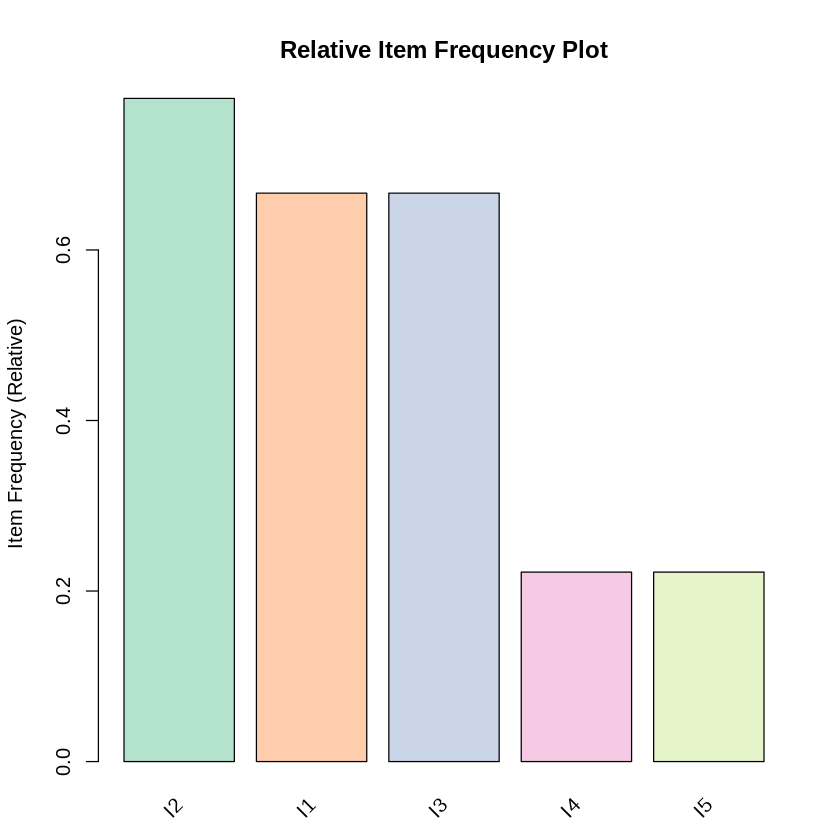

In [ ]:
arules::itemFrequencyPlot(tr1, topN=5, col=brewer.pal(5,"Pastel2"), main="Relative Item Frequency Plot",type='relative',ylab="Item Frequency (Relative)")

In [ ]:
I1_rules_lhs=subset(rules1, subset=lhs %pin% "I1")
summary(I1_rules_lhs)

set of 3 rules

rule length distribution (lhs + rhs):sizes
2 3 
2 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.333   2.500   3.000 

summary of quality measures:
    support         confidence        coverage           lift       
 Min.   :0.2222   Min.   :0.6667   Min.   :0.2222   Min.   :0.8571  
 1st Qu.:0.3333   1st Qu.:0.6667   1st Qu.:0.4444   1st Qu.:0.9286  
 Median :0.4444   Median :0.6667   Median :0.6667   Median :1.0000  
 Mean   :0.3704   Mean   :0.7778   Mean   :0.5185   Mean   :1.0476  
 3rd Qu.:0.4444   3rd Qu.:0.8333   3rd Qu.:0.6667   3rd Qu.:1.1429  
 Max.   :0.4444   Max.   :1.0000   Max.   :0.6667   Max.   :1.2857  
     count      
 Min.   :2.000  
 1st Qu.:3.000  
 Median :4.000  
 Mean   :3.333  
 3rd Qu.:4.000  
 Max.   :4.000  

mining info:
 data ntransactions support confidence
  tr1             9     0.2        0.6
                                                          call
 apriori(data = tr1, parameter = list(supp = 

In [ ]:
inspect(I1_rules_lhs)

    lhs         rhs  support   confidence coverage  lift      count
[1] {I1}     => {I3} 0.4444444 0.6666667  0.6666667 1.0000000 4    
[2] {I1}     => {I2} 0.4444444 0.6666667  0.6666667 0.8571429 4    
[3] {I1, I5} => {I2} 0.2222222 1.0000000  0.2222222 1.2857143 2    


In [ ]:
rules1_df=DATAFRAME(rules1, setStart='', setEnd='', separate=TRUE)
rules1_df

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,,I3,0.6666667,0.6666667,1.0000000,1.0000000,6
2,,I1,0.6666667,0.6666667,1.0000000,1.0000000,6
3,,I2,0.7777778,0.7777778,1.0000000,1.0000000,7
4,I4,I2,0.2222222,1.0000000,0.2222222,1.2857143,2
5,I5,I1,0.2222222,1.0000000,0.2222222,1.5000000,2
6,I5,I2,0.2222222,1.0000000,0.2222222,1.2857143,2
7,I3,I1,0.4444444,0.6666667,0.6666667,1.0000000,4
8,I1,I3,0.4444444,0.6666667,0.6666667,1.0000000,4
9,I3,I2,0.4444444,0.6666667,0.6666667,0.8571429,4
